# Importing numpy and pandas as np and pd

In [1]:
import numpy as np
import pandas as pd

# load the train csv file using pandas

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Read the test csv file using pandas

In [3]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Initial brief of titanic dataset

# Exploring the titanic dataset
checking the shape of the train dataset and test dataset

In [4]:
print("Shape of train dataset",train.shape)
print("shape of test dataset",test.shape)

Shape of train dataset (891, 12)
shape of test dataset (418, 11)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the train dataset, There is a missing of data for age, cabin and embarked.
Only 714 data present for Age column.
Only 204 data present for cabin column.
and just 2 data missing for embarked column.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In the test dataset, 332 out of 418 data is present for age,
one data is missing for fare, 
91 data is present for cabin

To check the number of missing value in train dataset 

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the train dataset, We can see Age attibute has 177 missing data, cabin attribute has 687 missing data and Embarked attribute has 2 missing data

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the test dataset We can see Age attibute has 86 missing data, cabin attribute has 327 missing data

# Import python library for Visualization

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Let's check the survival for male and female for different attibutes

In [10]:
def Bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    frame=pd.DataFrame([survived,dead])
    frame.index=['Survived','Dead']
    frame.plot(kind='bar',stacked=True,figsize=(10,6))

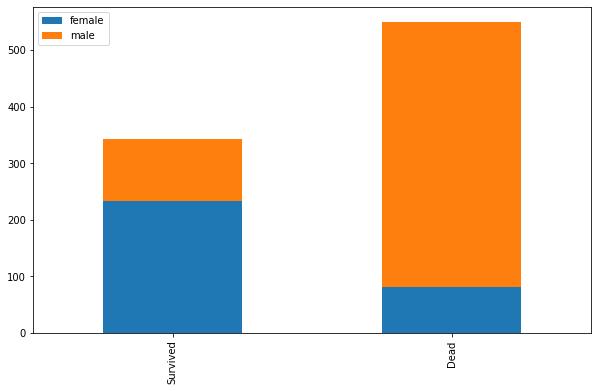

In [11]:
Bar_chart('Sex')

Here, we can see that in the train dataset, female suvival range is higher than male survival.

In [12]:
train.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

 We can see that 74% female survived where 81% male died

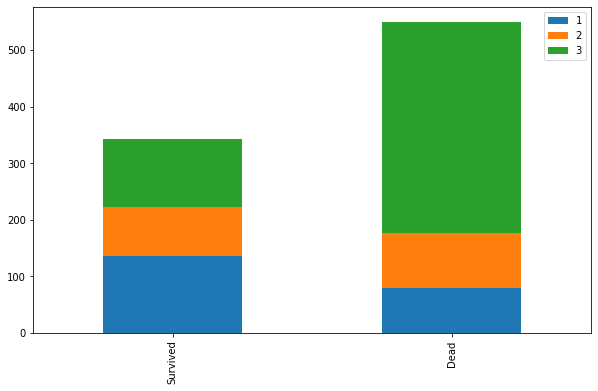

In [13]:
Bar_chart('Pclass')

Here we can see that, 1st class passenger have higher survival rate and 3rd class people have higher death rate

In [14]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

almost 63% of 1st class people survived and 76% of 3rd class people died

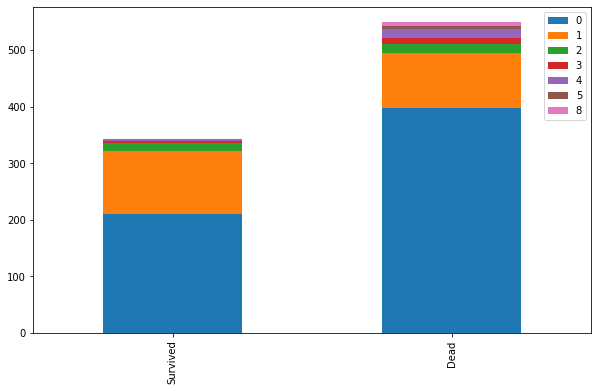

In [15]:
Bar_chart('SibSp')

The chart shows those who were with their siblings and spouse of 1 or 2 were more likely survived
and those who were without siblings and spouse and more than 2 were more likely dead

In [16]:
train.groupby('SibSp')['Survived'].value_counts(normalize=True)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64

SibSp with 1 and 2 have higher survival percentage and SibSp with 0 and more than 2 have higher death rate

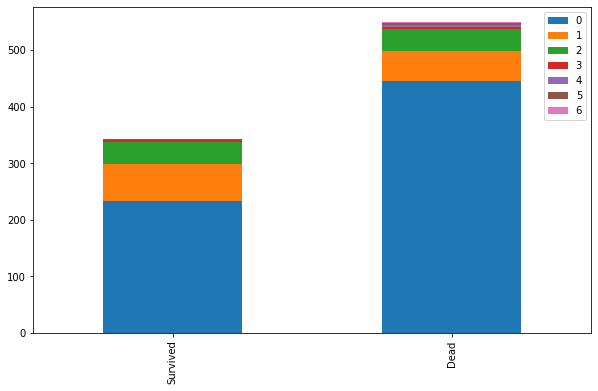

In [17]:
Bar_chart('Parch')

those who were with their parents and who have childrens are more likely survived and the persons who aboarded alone were dead

In [18]:
train.groupby('Parch')['Survived'].value_counts(normalize=True)

Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

Passenger with 2 and 3 parent and children have higher survival percentage and others have lower percentage

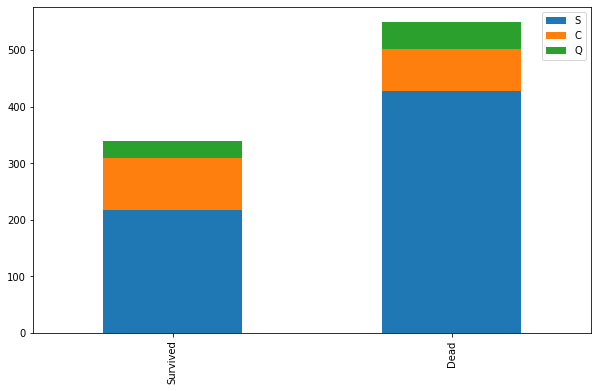

In [19]:
Bar_chart('Embarked')

the people who aboared from C were slightly more likely survived and those who aboarded from S were more likely dead

In [20]:
train.groupby('Embarked')['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

here 55% of people who aboared from C were survived and 66% who aboarded from S were died

# Survival and death based on Age attibute

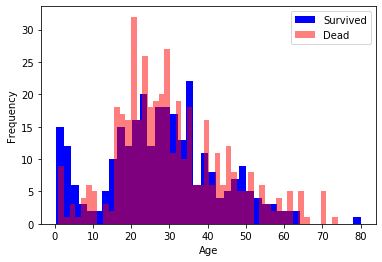

In [21]:
survived=train[train['Survived']==1]
dead=train[train['Survived']==0]
survived['Age'].plot.hist(color='blue',bins=40)
dead['Age'].plot.hist(alpha=0.5,color='red',bins=50)
plt.xlabel('Age')
plt.legend(['Survived','Dead'])

 So, we can see that age attibute plays an important role in survival and death

# Correlation

In [22]:
train.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


As we are intersed in relation of survival with other features and we can see that the Pclass is an important feature to determine the survival. Although fare has also a relation with survival but it is in relation with pclass, so doesn't give the clear picture for survival determining, because survival is not a continuous variable.

# Data Cleaning

delete unnecessary feature from dataset

In [23]:
#combining train test dataset
train_test_data=[train,test]
for data in train_test_data:
    data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [24]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Don           1
Lady          1
Mme           1
Sir           1
Jonkheer      1
Countess      1
Ms            1
Name: Title, dtype: int64

In [25]:
title_mapping={"Mr":0,
               "Miss":1,
               "Mrs":2,
               "Master":3,
               "Dr":3,
               "Rev":3,
               "Major":3,
               "Col":3,
               "Mlle":3,
               "Lady":3,
               "Don":3,
               "Mme":3,
               "Countess":3,
               "Sir":3,
               "Ms":3,
               "Capt":3,
               "Dona":3,
               "Jonkheer":3}
for data in train_test_data:
    data['Title']=data['Title'].map(title_mapping)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


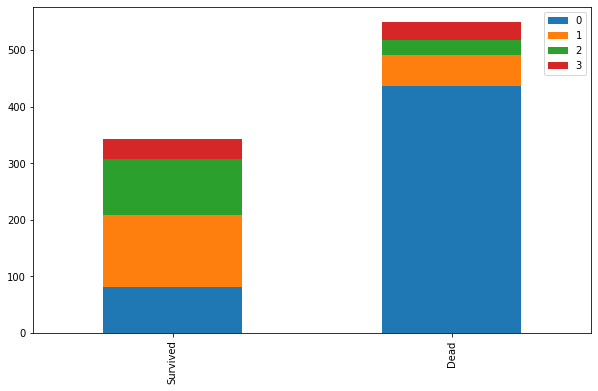

In [28]:
Bar_chart('Title')

In [29]:
train.drop('Name',axis=1,inplace=True)

In [30]:
test.drop('Name',axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


# Sex mapping

In [33]:
sex_mapping={"male":0,"female":1}
for data in train_test_data:
    data['Sex']=data['Sex'].map(sex_mapping)

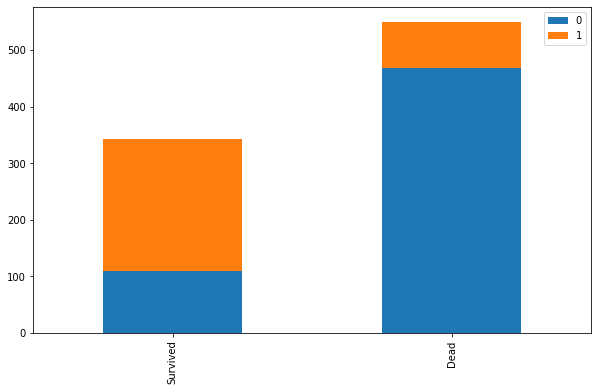

In [34]:
Bar_chart('Sex')

# Age mapping

In [83]:
train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0
5,6,0,3,0,2.0,0.0,2.0,2,0,0.0
6,7,0,1,0,3.0,2.0,1.6,0,0,0.0
7,8,0,3,0,0.0,1.0,2.0,0,3,1.6
8,9,1,3,1,2.0,0.0,2.0,0,2,0.8
9,10,1,2,1,0.0,2.0,1.8,1,2,0.4


In [36]:
#fill missing age with median age for each title
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

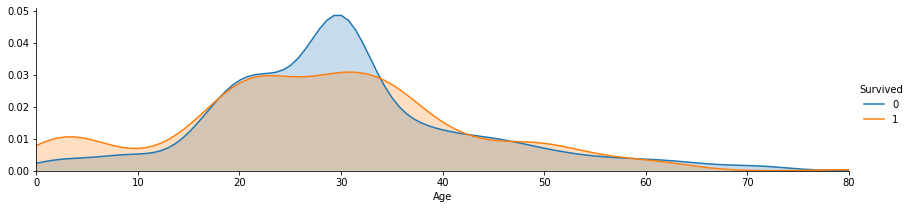

In [37]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

death range is higher in age of 20 to 35 and survival rate is higher in age of 0-19 and 35-45

In [38]:
for data in train_test_data:
    data.loc[data['Age']<=16,'Age']=0,
    data.loc[(data['Age']>16)& (data['Age']<=26), 'Age']=1,
    data.loc[(data['Age']>26)& (data['Age']<=36), 'Age']=2,
    data.loc[(data['Age']>36)& (data['Age']<=62), 'Age']=3,
    data.loc[(data['Age']>62),'Age']=4

In [39]:
train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2


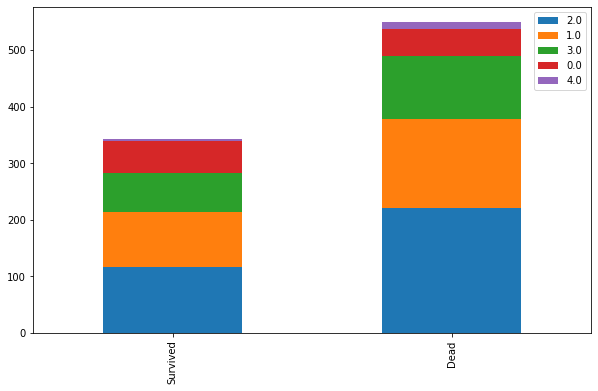

In [40]:
Bar_chart('Age')

# Filling missing values for embarked

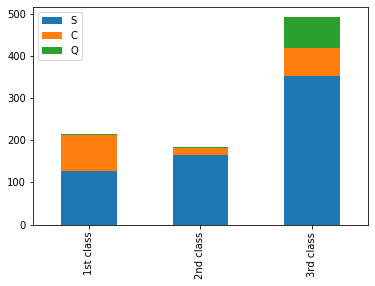

In [41]:
pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True)

here we can see that more than 50% of S embark is from 1st, 2nd and 3rd class

fill out missing embark from S embark

In [42]:
for data in train_test_data:
    data['Embarked']=data['Embarked'].fillna('S')

In [43]:
embarked_mapping={"S":0,
                  "C":1,
                  "Q":2}
for data in train_test_data:
    data['Embarked']=data['Embarked'].map(embarked_mapping)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


# Fare mapping

In [45]:
#fill missing fare with median fare for each title
train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)

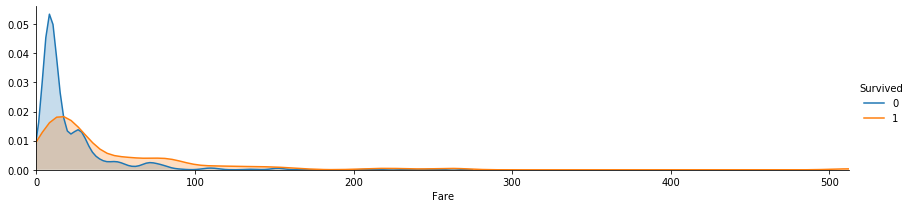

In [46]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

3rd class people who buy the ticket at lower cost were more likely died and those who buy costly ticket have greater survival rate

In [47]:
#rearrange the passenger based on the fare for better prediction
for data in train_test_data:
    data.loc[data['Fare']<=17,'Fare']=0,
    data.loc[(data['Fare']>17)& (data['Fare']<=30), 'Fare']=1,
    data.loc[(data['Fare']>30)& (data['Fare']<=100), 'Fare']=2,
    data.loc[(data['Fare']>100),'Fare']=3

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


# Cabin mapping

In [49]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F2             3
              ..
A23            1
D47            1
C50            1
A31            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [50]:
for data in train_test_data:
    data['Cabin']=data['Cabin'].str[:1]


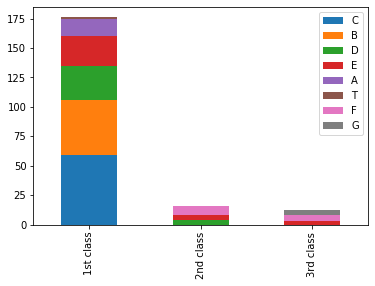

In [51]:
pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True)

In [52]:
cabin_mapping={"A":0,
              "B":0.4,
              "C":0.8,
              "D":1.2,
              "E":1.6,
              "F":2,
              "G":2.4,
              "T":2.8}
for data in train_test_data:
    data['Cabin']=data['Cabin'].map(cabin_mapping)

In [53]:
#fill missing cabin with median cabin for each title
train['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

# Family Size (SibSp and Parch)

In [54]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1


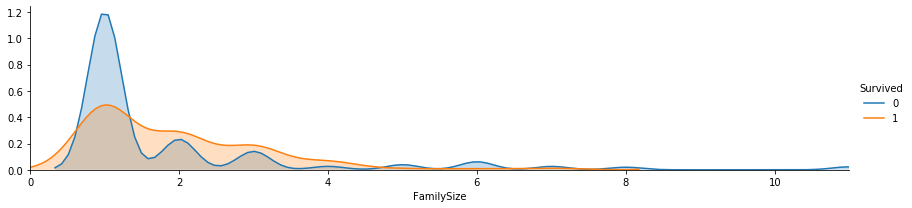

In [55]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"FamilySize",shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.show()

In [56]:
family_mapping={
    1:0,
    2:0.4,
    3:0.8,
    4:1.2,
    5:1.6,
    6:2.0,
    7:2.4,
    8:2.8,
    9:3.2,
    10:3.6,
    11:4
}

for data in train_test_data:
    data['FamilySize']=data['FamilySize'].map(family_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# Now dropping Ticket, SibSP, Parch as these attributes no longer useful

In [58]:
features=['Ticket','SibSp','Parch']
train=train.drop(features,axis=1)
test=test.drop(features,axis=1)

In [59]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']
train_data.shape, target.shape

((891, 9), (891,))

In [60]:
train_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,3.0,2.0,0.8,1,2,0.4
2,3,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,2.0,2.0,0.8,0,2,0.4
4,5,3,0,2.0,0.0,2.0,0,0,0.0
5,6,3,0,2.0,0.0,2.0,2,0,0.0
6,7,1,0,3.0,2.0,1.6,0,0,0.0
7,8,3,0,0.0,1.0,2.0,0,3,1.6
8,9,3,1,2.0,0.0,2.0,0,2,0.8
9,10,2,1,0.0,2.0,1.8,1,2,0.4


# Data modelling

let's import classifier model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Title        891 non-null    int64  
 9   FamilySize   891 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


# Cross Validation (K-fold)

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

In [64]:
clf=KNeighborsClassifier(n_neighbors=3)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
score

array([0.53333333, 0.68539326, 0.43820225, 0.60674157, 0.61797753,
       0.65168539, 0.47191011, 0.62921348, 0.59550562, 0.59550562])

In [65]:
print("Accuracy using KNeighbors Classifier: ",round(np.mean(score)*100,2))

Accuracy using KNeighbors Classifier:  58.25


# Decision Tree

In [66]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
score

array([0.71111111, 0.78651685, 0.70786517, 0.7752809 , 0.71910112,
       0.7752809 , 0.70786517, 0.68539326, 0.70786517, 0.76404494])

In [67]:
print("Accuracy using Decision tree: ",round(np.mean(score)*100,2))

Accuracy using Decision tree:  73.4


# Random Forest

In [68]:
clf=RandomForestClassifier(n_estimators=100)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.85393258 0.7752809  0.80898876 0.79775281 0.80898876
 0.78651685 0.70786517 0.78651685 0.83146067]


In [69]:
print("Accuracy using Random Forest:",round(np.mean(score)*100,2))

Accuracy using Random Forest: 79.91


# Naive Bayes

In [70]:
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [71]:
print("Accuracy using Gaussian Naive Bayes:",round(np.mean(score)*100,2))

Accuracy using Gaussian Naive Bayes: 78.78


# SVM

In [72]:
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [73]:
print("Accuracy using SVM",round(np.mean(score)*100,2))

Accuracy using SVM 61.62


# Grid Search

In [74]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [10,13,70,90,100], 
              'criterion': ('gini','entropy'),
              'max_depth': [3,5,7,9,10], 
              'max_features':('auto','sqrt'),
             'min_samples_split': (2,4,6)}

model = RandomForestClassifier()
Grid = GridSearchCV(model, param_grid=parameters, cv=3, n_jobs=-1, scoring='accuracy')

In [75]:
Grid.fit(train_data,target)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [76]:
Grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
Grid.best_score_

0.8327721661054994

# Testing and creating csv file for kaggle submission

As we get the highest accuracy using Random Forest, I am using this random forest to predict the survival


In [78]:
train_data.shape

(891, 9)

In [79]:
test.shape

(418, 9)

In [80]:
clf=RandomForestClassifier()
clf.fit(train_data,target)
prediction=clf.predict(test)

In [81]:
Submission=pd.DataFrame(
{
    "PassengerId":test['PassengerId'],
    "Survived":prediction
})
Submission.to_csv('Submission.csv',index=False)

In [82]:
submission=pd.read_csv("Submission.csv")
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
